# Analyzing Text of Tweets Sent to Apple Support

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
dataset = pd.read_csv('twcs.csv')
dataset

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,@143549 @sprintcare You have to go to https://...,NaN,2812239.0
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.c...",NaN,2987950.0


In [62]:
apple_tweets = dataset[ dataset['author_id'].apply(lambda s: 'applesupport' in s.lower()) ]
apple_tweets

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
396,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0
398,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0
401,701,AppleSupport,False,Tue Oct 31 22:26:49 +0000 2017,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
403,703,AppleSupport,False,Tue Oct 31 22:09:52 +0000 2017,@115855 Any steps tried since it started last ...,702,704.0
405,705,AppleSupport,False,Tue Oct 31 21:57:00 +0000 2017,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0
...,...,...,...,...,...,...,...
2811310,2987499,AppleSupport,False,Wed Nov 22 01:02:29 +0000 2017,@823737 We're happy to help out with your conc...,2987500,2987501.0
2811419,2987604,AppleSupport,False,Wed Nov 22 02:33:58 +0000 2017,@689907 We're certainly glad to get you pointe...,NaN,2987605.0
2811421,2987606,AppleSupport,False,Wed Nov 22 02:29:26 +0000 2017,@823765 We'd love to help! Which device are yo...,NaN,2987607.0
2811483,2987662,AppleSupport,False,Wed Nov 22 03:27:30 +0000 2017,@823779 We'd like to help. Send us a DM and we...,NaN,2987663.0


In [63]:
dataset['author_id'].value_counts().head()

AmazonHelp      169840
AppleSupport    106860
Uber_Support     56270
SpotifyCares     43265
Delta            42253
Name: author_id, dtype: int64

In [64]:
len(set(dataset[ dataset['inbound'] == False ]['author_id']))

108

^ Apple is the second most represented company, out of 108 in the dataset, in terms of how many tweets we have from the AppleSupport account. 

## Taking the subset of tweets sent to @AppleSupport, and text cleaning

In [65]:
tweets_to_apple = dataset[ dataset['text'].apply(lambda s: '@applesupport' in s.lower()) ]  
tweets_to_apple

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,@AppleSupport The newest update. I️ made sure ...,699,696.0
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,@AppleSupport https://t.co/NV0yucs0lB,696,700.0
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,@AppleSupport why are my I️’s changing not sho...,698,NaN
402,702,115855,True,Tue Oct 31 22:11:31 +0000 2017,@AppleSupport Tried resetting my settings .. r...,701,703.0
404,704,115855,True,Tue Oct 31 21:59:17 +0000 2017,@AppleSupport This is what it looks like https...,703,705.0
...,...,...,...,...,...,...,...
2811311,2987500,823737,True,Wed Nov 22 01:21:40 +0000 2017,@AppleSupport I updates slack and everything s...,NaN,2987499.0
2811420,2987605,689907,True,Wed Nov 22 02:11:43 +0000 2017,Hey @AppleSupport - not being able to duplicat...,2987604,NaN
2811422,2987607,823765,True,Wed Nov 22 02:17:14 +0000 2017,Yo @AppleSupport is that weird glitch w/ the c...,2987606,NaN
2811484,2987663,823779,True,Wed Nov 22 03:24:02 +0000 2017,What the fuck @AppleSupport my phone keeps ha...,2987662,NaN


In [66]:
text_to_apple = tweets_to_apple['text']
text_to_apple

397        @AppleSupport The newest update. I️ made sure ...
399                   @AppleSupport  https://t.co/NV0yucs0lB
400        @AppleSupport why are my I️’s changing not sho...
402        @AppleSupport Tried resetting my settings .. r...
404        @AppleSupport This is what it looks like https...
                                 ...                        
2811311    @AppleSupport I updates slack and everything s...
2811420    Hey @AppleSupport - not being able to duplicat...
2811422    Yo @AppleSupport is that weird glitch w/ the c...
2811484    What the fuck @AppleSupport  my phone keeps ha...
2811542    Is anyone having #iphone issues with there pho...
Name: text, Length: 97913, dtype: object

In [67]:
text_to_apple = text_to_apple.str.lower()
text_to_apple

397        @applesupport the newest update. i️ made sure ...
399                   @applesupport  https://t.co/nv0yucs0lb
400        @applesupport why are my i️’s changing not sho...
402        @applesupport tried resetting my settings .. r...
404        @applesupport this is what it looks like https...
                                 ...                        
2811311    @applesupport i updates slack and everything s...
2811420    hey @applesupport - not being able to duplicat...
2811422    yo @applesupport is that weird glitch w/ the c...
2811484    what the fuck @applesupport  my phone keeps ha...
2811542    is anyone having #iphone issues with there pho...
Name: text, Length: 97913, dtype: object

In [68]:
import string
punctuations = string.punctuation
print(punctuations)

%timeit
def remove_punctuations(text):
    return text.translate(str.maketrans('','',punctuations))
    
text_to_apple = text_to_apple.apply(remove_punctuations)
text_to_apple

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


397        applesupport the newest update i️ made sure to...
399                         applesupport  httpstconv0yucs0lb
400        applesupport why are my i️’s changing not show...
402        applesupport tried resetting my settings  rest...
404        applesupport this is what it looks like httpst...
                                 ...                        
2811311    applesupport i updates slack and everything se...
2811420    hey applesupport  not being able to duplicate ...
2811422    yo applesupport is that weird glitch w the cap...
2811484    what the fuck applesupport  my phone keeps han...
2811542    is anyone having iphone issues with there phon...
Name: text, Length: 97913, dtype: object

In [69]:
from nltk.corpus import stopwords
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [70]:
stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(words for words in str(text).split() if words not in stopwords_set)

In [71]:
text_to_apple = text_to_apple.apply(remove_stopwords)
text_to_apple

397        applesupport newest update i️ made sure downlo...
399                          applesupport httpstconv0yucs0lb
400        applesupport i️’s changing showing correctly s...
402        applesupport tried resetting settings restarti...
404               applesupport looks like httpstcoxcqu2l4xub
                                 ...                        
2811311    applesupport updates slack everything seems wo...
2811420    hey applesupport able duplicate file pages sea...
2811422    yo applesupport weird glitch w capital “i️” at...
2811484    fuck applesupport phone keeps hanging calls sh...
2811542    anyone iphone issues phone freezing randomly 7...
Name: text, Length: 97913, dtype: object

## Top most common words in tweets to Apple Support

In [72]:
from collections import Counter
cnt = Counter()

for text in text_to_apple.values:
    for word in text.split():
        cnt[word] +=1
        
cnt.most_common(10)

[('applesupport', 98594),
 ('iphone', 16820),
 ('phone', 15744),
 ('ios', 13841),
 ('update', 11005),
 ('115858', 9712),
 ('apple', 8969),
 ('i️', 8829),
 ('fix', 8030),
 ('battery', 6621)]

This list of most common words isn't in shape to be especially useful yet. We want to focus on words that name Apple products (e.g. 'iphone', 'ios'), or components thereof ('battery'), or other processes and issues with the products ('update').

<i>Count words by putting them all into a pandas series, where we can then just use value_counts()?

In [73]:
text_to_apple

397        applesupport newest update i️ made sure downlo...
399                          applesupport httpstconv0yucs0lb
400        applesupport i️’s changing showing correctly s...
402        applesupport tried resetting settings restarti...
404               applesupport looks like httpstcoxcqu2l4xub
                                 ...                        
2811311    applesupport updates slack everything seems wo...
2811420    hey applesupport able duplicate file pages sea...
2811422    yo applesupport weird glitch w capital “i️” at...
2811484    fuck applesupport phone keeps hanging calls sh...
2811542    anyone iphone issues phone freezing randomly 7...
Name: text, Length: 97913, dtype: object

In [74]:
complete_word_list = []
def create_complete_word_list(string):
    small_word_list = string.split(' ')
    for word in small_word_list:
        complete_word_list.append(word)

In [75]:
text_to_apple.apply(create_complete_word_list)

397        None
399        None
400        None
402        None
404        None
           ... 
2811311    None
2811420    None
2811422    None
2811484    None
2811542    None
Name: text, Length: 97913, dtype: object

In [76]:
complete_word_list

['applesupport',
 'newest',
 'update',
 'i️',
 'made',
 'sure',
 'download',
 'yesterday',
 'applesupport',
 'httpstconv0yucs0lb',
 'applesupport',
 'i️’s',
 'changing',
 'showing',
 'correctly',
 'social',
 'media',
 'platforms',
 'httpstcogyrvpyvnke',
 'applesupport',
 'tried',
 'resetting',
 'settings',
 'restarting',
 'phone',
 'applesupport',
 'looks',
 'like',
 'httpstcoxcqu2l4xub',
 'applesupport',
 'i️',
 'iphone',
 '7',
 'plus',
 'yes',
 'i️',
 'applesupport',
 'i️',
 'need',
 'answers',
 'it’s',
 'annoying',
 '🙃',
 'applesupport',
 'sent',
 'dm',
 'hey',
 'applesupport',
 'anyone',
 'else',
 'upgraded',
 'ios111',
 'y’all',
 'issues',
 'capital',
 '“i️”',
 'mail',
 'app',
 'puts',
 '“a”',
 'applesupport',
 'happening',
 'httpstcox3szsjxfat',
 'applesupport',
 'call',
 'centres',
 'closed',
 'night',
 '115858',
 'applesupport',
 'hello',
 'lines',
 'closed',
 'tonight',
 'help',
 '115861',
 '115862',
 'applesupport',
 'i️',
 'upgraded',
 'i️t',
 'didn’t',
 'work',
 '115862',
 

In [77]:
words_series = pd.Series(complete_word_list)
words_series

0                                               applesupport
1                                                     newest
2                                                     update
3                                                         i️
4                                                       made
                                 ...                        
1069391                                                🤬😡🤬😡🤬
1069392                                               115858
1069393                                         applesupport
1069394                            whycan’tyouguysgetitright
1069395    stopmakingnewphonesuntillyoulearntomaketheoldo...
Length: 1069396, dtype: object

In [78]:
words_series.loc[1069395]

'stopmakingnewphonesuntillyoulearntomaketheoldonerunrite'

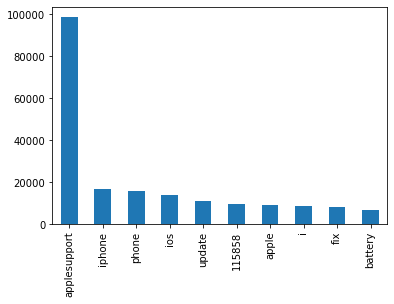

In [79]:
words_series.value_counts().head(10).plot.bar();

### Finding the most product-relevant words

In [80]:
words_series.value_counts()[:50]

applesupport    98594
iphone          16820
phone           15744
ios             13841
update          11005
115858           9712
apple            8969
i️               8829
fix              8030
battery          6621
help             6564
it’s             6452
new              6318
please           5448
get              5063
i’m              4984
app              4956
since            4743
still            4643
thanks           4547
11               4429
screen           4221
time             4210
like             3993
issue            3851
work             3840
apps             3809
can’t            3766
updated          3758
back             3617
7                3600
problem          3369
amp              3189
even             3149
music            3044
every            2969
1103             2956
working          2952
i’ve             2913
one              2856
need             2781
ios11            2725
hey              2688
yes              2672
thank            2656
use       

Relevant words we can see:

Top 10:

    iphone, phone --> phone
    ios
    update, updated, updates, updating --> updat
    battery
    screen
    music
    wifi
    ipad
    itunes
    watch
    
    
next 5:

    icloud
    freezing, freezes --> freez
    macbook
    photos
    keyboard

In [81]:
top_10_apple_words = ['phone', 'ios', 'updat', 'battery', 'app', 'screen', 'music', 'wifi', 'itunes'] 

In [82]:
phone_in_text = text_to_apple[text_to_apple.apply(lambda s: 'phone' in s)]
phone_in_text

402        applesupport tried resetting settings restarti...
406                     applesupport i️ iphone 7 plus yes i️
427        hello internet someone explain symbol keeps ap...
429        applesupport i’ve got screenshot saying iphone...
431                applesupport iphone 6s plus recent update
                                 ...                        
2811036    im trying understand applesupport told reset p...
2811116    travelled hour 115858 store get repairs £1000 ...
2811295    applesupport iphone 7 constantly searching sig...
2811484    fuck applesupport phone keeps hanging calls sh...
2811542    anyone iphone issues phone freezing randomly 7...
Name: text, Length: 31160, dtype: object

In [24]:
phone_in_text[phone_in_text.apply(lambda s: 'battery' in s)]

6713       applesupport said battery dying fast new ios 1...
7571       battery 64 restarted phone it’s 52 fuck fix sh...
9462       applesupport im using iphone6sit installed ios...
10982      applesupport ios 11 draining battery iphone 7 ...
11547      anyone else battery issues iphone degrading wa...
                                 ...                        
2808069    ok applesupport told update phone stupidly bat...
2808834    applesupport soooo explain phone charger less ...
2810098    applesupport 115858 way check battery health d...
2810100    applesupport every time bring new phone releas...
2810374    applesupport quickquestion iphone literally ov...
Name: text, Length: 3264, dtype: object

In [25]:
text_to_apple.loc[1733208]

'applesupport congratulations reinvented telephone wire 😡😡😡 ios11 bigshit nobattery nextwillbeasamsung'

In [26]:
dataset.loc[1733208, 'text']

'@AppleSupport Congratulations You have just re-invented the telephone with wire !!! 😡😡😡 #ios11 #bigshit #nobattery #nextwillbeasamsung'

In [27]:
update_in_text = text_to_apple[text_to_apple.apply(lambda s: 'updat' in s)]
update_in_text

397        applesupport newest update i️ made sure downlo...
431                applesupport iphone 6s plus recent update
433        thank applesupport updated phone even slower b...
441        applesupport need software update urgently bat...
460           update ios1103 spotify lock screenapplesupport
                                 ...                        
2809061    applesupport don’t guys ever test damn updates...
2810100    applesupport every time bring new phone releas...
2810102    applesupport reason iphone 6s plus extremely l...
2811311    applesupport updates slack everything seems wo...
2811542    anyone iphone issues phone freezing randomly 7...
Name: text, Length: 16203, dtype: object

### Number of tweets in which each of the top 10 product-relevant words appear

In [83]:
for word in top_10_apple_words:
    word_appearances = len(text_to_apple[text_to_apple.apply(lambda s: word in s)])
    print(f'{word}: {word_appearances}')

phone: 31160
ios: 16545
updat: 16203
battery: 6316
app: 97913
screen: 4464
music: 2752
wifi: 2155
itunes: 1730


In [87]:
top_10_words_appearances = {'phone': 31160,
'ios': 16545,
'updat': 16203,
'battery': 6316,
'app': 97913,
'screen': 4464,
'music': 2752,
'wifi': 2155,
'itunes': 1730}

---
<i>The rest below is in progress. Please pardon the dust...

In [40]:
def find_top_words(s):
    '''
    For each tweet text, returns True if text contains one of the top 10 relevant words for Apple;
    otherwise returns False.
    '''
    for word in s.split(' '):
        if word in top_10_apple_words:
            return True
    return False

In [43]:
texts_with_top_words = text_to_apple[text_to_apple.apply(find_top_words)]
texts_with_top_words

413        hey anyone else upgraded ios111 y’all issues c...
458                 app still longer able control lockscreen
1182       6 yes ios11 checked updates none available i’v...
1187       get white screen nothing loads short time clos...
1895             show music stored like os3 want store music
                                 ...                        
2810104    hey listen one podcast order continuously oh i...
2810106    way disable music censoring music uae store 11...
2810941    dont think support restored thrice 8 months 7 ...
2810943    107178 iphone7plus black dead screen times hom...
2811295          7 constantly searching signal works im wifi
Name: text, Length: 13304, dtype: object

---
---

In [28]:
freq_words = set([w for (w,wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return ' '.join(word for word in str(text).split() if word not in freq_words)

text_to_apple = text_to_apple.apply(remove_freqwords)
text_to_apple

397                      newest made sure download yesterday
399                                       httpstconv0yucs0lb
400        i️’s changing showing correctly social media p...
402                      tried resetting settings restarting
404                            looks like httpstcoxcqu2l4xub
                                 ...                        
2811311    updates slack everything seems working well th...
2811420    hey able duplicate file pages searched really ...
2811422    yo weird glitch w capital “i️” attempt make tw...
2811484    fuck keeps hanging calls showing “call failure...
2811542    anyone issues freezing randomly 7 pulse update...
Name: text, Length: 97913, dtype: object

In [29]:
n_rare_words = 10
rare_words = set([w for (w,c) in cnt.most_common()][:- n_rare_words: -1])
print(rare_words)

def remove_rarewords(text):
    return ' '.join(word for word in str(text).split() if word not in rare_words)

text_to_apple = text_to_apple.apply(remove_rarewords)
text_to_apple

{'accessory’', 'stopmakingnewphonesuntillyoulearntomaketheoldonerunrite', '🙎🏾\u200d♂️', 'httpstcowhfr9hiijq', 'httpstcocqngyqnslz', '🤬😡🤬😡🤬', 'unsaving', 'whycan’tyouguysgetitright', '‘cannot'}


397                      newest made sure download yesterday
399                                       httpstconv0yucs0lb
400        i️’s changing showing correctly social media p...
402                      tried resetting settings restarting
404                            looks like httpstcoxcqu2l4xub
                                 ...                        
2811311    updates slack everything seems working well th...
2811420    hey able duplicate file pages searched really ...
2811422    yo weird glitch w capital “i️” attempt make tw...
2811484    fuck keeps hanging calls showing “call failure...
2811542    anyone issues freezing randomly 7 pulse update...
Name: text, Length: 97913, dtype: object